# OpenAlex concepts

More information about concepts at:
+ [OpenAlex documentation](https://docs.openalex.org/about-the-data/concept)
+ [Automated concept tagging for OpenAlex, an open index of scholarly articles](https://docs.google.com/document/d/1OgXSLriHO3Ekz0OYoaoP_h0sPcuvV4EqX7VgLLblKe4/edit)
+ [A Web-scale system for scientific knowledge exploration](https://arxiv.org/abs/1805.12216)

## Libraries

In [1]:
import requests
import json
import pandas as pd
from functions import *

**Aim:** To retrive Wikidata concepts metadata from OpenAlex by OpenAlex API.

The URL base is [https://api.openalex.org/concepts?per-page=100&cursor=*](https://api.openalex.org/concepts?per-page=100&cursor=*)

In [2]:
base_url = 'https://api.openalex.org/concepts?per-page=200&cursor='

# 1. OpenAlex API

## 1.1.First look

In [3]:
data = requests.get(base_url+'*').json()

There are a total of 65073 wikidata concepts.

In [4]:
total = data['meta']['count']
total

65073

These results are exported to a JSON file. This file is the first one of 326 files.

In [5]:
with open('data/json/data_1.json', 'w', encoding='utf-8') as f:
    json.dump(data['results'], f, ensure_ascii=False, indent=4)

Main metadata are retrieved.

In [6]:
df = retrieve_metadata(data)
df

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,https://en.wikipedia.org/wiki/Computer%20science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,https://en.wikipedia.org/wiki/Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,https://en.wikipedia.org/wiki/Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,https://en.wikipedia.org/wiki/Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,https://en.wikipedia.org/wiki/Biology
...,...,...,...,...,...,...,...
195,https://openalex.org/C118518473,Agriculture,2,"cultivation of life forms for food, fiber, bio...",778494,5119440,https://en.wikipedia.org/wiki/Agriculture
196,https://openalex.org/C171146098,Automotive engineering,1,discipline of engineering,778450,3602873,https://en.wikipedia.org/wiki/Automotive%20eng...
197,https://openalex.org/C78458016,Evolutionary biology,1,sub-field of biology,775509,17188869,https://en.wikipedia.org/wiki/Evolutionary%20b...
198,https://openalex.org/C138921699,Political economy,1,"study of production, buying, and selling, and ...",774255,6406746,https://en.wikipedia.org/wiki/Political%20economy


## 1.2. Data retrieval

All other queries and files are processed through a loop.

In [7]:
next_cursor = data['meta']['next_cursor']

count = 1
while('next_cursor' in data['meta'] and data['meta']['next_cursor'] is not None):
    
    count += 1
    print(str(round(100*count/(total/200),0))+'%', end = '\r')
    
    next_cursor = data['meta']['next_cursor']
    data = requests.get(base_url+next_cursor).json()
    
    df_aux = retrieve_metadata(data)
    df = pd.concat([df, df_aux], ignore_index=True)
    
    with open(('data/json/data_'+str(count)+'.json'), 'w', encoding='utf-8') as f:
        json.dump(data['results'], f, ensure_ascii=False, indent=4)
    

TypeError: can only concatenate str (not "NoneType") to str

In [8]:
df

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
0,https://openalex.org/C41008148,Computer science,0,theoretical study of the formal foundation ena...,40682740,214331178,https://en.wikipedia.org/wiki/Computer%20science
1,https://openalex.org/C71924100,Medicine,0,"field of study for diagnosing, treating and pr...",36922842,365520781,https://en.wikipedia.org/wiki/Medicine
2,https://openalex.org/C185592680,Chemistry,0,branch of physical science concerned with the ...,20875665,323892328,https://en.wikipedia.org/wiki/Chemistry
3,https://openalex.org/C15744967,Psychology,0,scientific study of the way the human mind wor...,17578455,158517692,https://en.wikipedia.org/wiki/Psychology
4,https://openalex.org/C86803240,Biology,0,branch of science that primarily deals with st...,17069976,347954000,https://en.wikipedia.org/wiki/Biology
...,...,...,...,...,...,...,...
65068,https://openalex.org/C3017515992,Printing ink,3,liquid or paste that contains pigments or dyes,0,0,https://en.wikipedia.org/wiki/Ink
65069,https://openalex.org/C3020659265,Clinical vignette,2,"detailed medical report on the symptoms, signs...",0,0,https://en.wikipedia.org/wiki/Case%20report
65070,https://openalex.org/C51201719,ROMK,3,mammalian protein found in Homo sapiens,0,0,https://en.wikipedia.org/wiki/ROMK
65071,https://openalex.org/C68466841,Antenna amplifier,5,amplifier applied on high frequency signals co...,0,0,https://en.wikipedia.org/wiki/Antenna%20amplifier


Some types are fixed.

In [47]:
df.level = df.level.astype('int')
df.works_count = df.works_count.astype('int')
df.cited_by_count = df.cited_by_count.astype('int')

<AxesSubplot:>

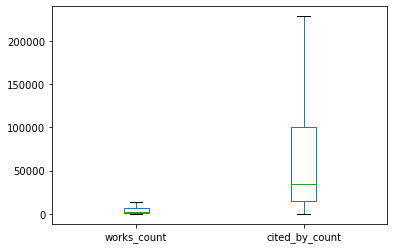

In [50]:
df.boxplot(column=['works_count', 'cited_by_count'],
           grid=False,
           showfliers=False)

In [9]:
df[df.wikipedia_url.isna()]

,id,display_name,level,description,works_count,cited_by_count,wikipedia_url
29,https://openalex.org/C164705383,Cardiology,1,branch of medicine dealing with disorders of t...,2575507,30625304,None
32,https://openalex.org/C199539241,Law,1,"system of rules and guidelines, generally back...",2448085,6214334,None
44,https://openalex.org/C153911025,Molecular biology,1,branch of biology that deals with the molecula...,2107447,56016211,None
59,https://openalex.org/C111472728,Epistemology,1,branch of philosophy studying the nature and s...,1794628,15723086,None
105,https://openalex.org/C1862650,Physical therapy,1,health profession that aims to address the ill...,1269466,19708336,None
...,...,...,...,...,...,...,...
64511,https://openalex.org/C130430149,Free module,3,"in algebra, a module that has a basis",218,2604,None
64705,https://openalex.org/C39486346,Pre-algebra,5,common name for a course in middle school math...,170,1128,None
64719,https://openalex.org/C128954960,Converged infrastructure,5,None,167,3311,None
64726,https://openalex.org/C385485,Mental chronometry,5,form of chronometry,166,5998,None


In [11]:
df.to_csv('data/openalex_concepts.tsv', index=False, sep='\t')